In [1]:
# pip install selenium
# pip install beautifulsoup4

In [6]:
# Importing necessary libraries
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
# Date the data is scraped: 11 Jan 2023

# Goal: Scrape at least 1.5k reviews for low ratings (1 and 2), 1.5k reviews for high ratings (4 and 5)
reviews = []
ratings = []
dates = []
pages = np.arange(0,6010,10)

for page_num in pages:
    if page_num==0:
        page = "https://www.yelp.com/biz/disneyland-park-anaheim-7"
    else:
        page = "https://www.yelp.com/biz/disneyland-park-anaheim-7?start="+str(page_num)
    
    driver = webdriver.Chrome()
    driver.get(page)
    sleep(6) # sleep() - gives time for the website to load and to scrape
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    # Get the divs of the review
    scraped_reviews = soup.find_all(class_=['comment__09f24__gu0rG css-qgunke'])
    # Get the rating score and date div
    div_tag = soup.find_all("div", {'class':'review__09f24__oHr9V border-color--default__09f24__NPAKY'})

    # Appending the scraped reviews into a list.
    print("Scraping the reviews of page number:",int(page_num/10))
    for review in scraped_reviews:
        reviews.append(review.get_text())
    print('number of reviews after scraping page number:',int(page_num/10),' is:',len(reviews))
    
    print("Scraping ratings of page number:",int(page_num/10))
    for review in div_tag:
        # For each review, find the rating span and extract the value
        rating_span = review.find("span", {'class':'display--inline__09f24__c6N_k border-color--default__09f24__NPAKY'}).div['aria-label']
        ratings.append(rating_span)
    print('number of ratings after scraping page number:',int(page_num/10),' is:',len(ratings))
    
    print("Scraping dates of page number:",int(page_num/10))
    for review in div_tag:
        # For each review, find the span containing the date
        date_span = review.find("span", {'class':'css-chan6m'})
        dates.append(date_span.get_text())
    print('number of ratings after scraping page number:',int(page_num/10),' is:',len(dates), '\n')

In [4]:
# Create a dictionary
review_and_rating = {'review': reviews, 'rating': ratings, 'date':dates}
# Create a dataframe
df = pd.DataFrame(data=review_and_rating)

In [5]:
# Export the scrape data to a csv file
df.to_csv('review_ratings.csv', index=False, encoding='utf-8')

In [7]:
df = pd.read_csv("review_ratings.csv")

5 star rating    3048
1 star rating    1146
4 star rating     895
3 star rating     481
2 star rating     430
Name: rating, dtype: int64

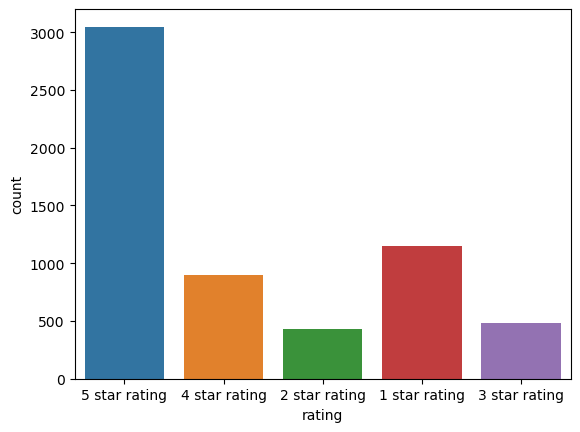

In [9]:
sns.countplot(x=df['rating'])
df['rating'].value_counts()

There is at least 1.5k in both positive (4 and 5 rating) and negative (1 and 2 rating) classes. No additional data needs to be scraped.